# Battle of the Neighborhoods

## 1. Introduction to Business Problem

The audience for this analysis will be the DOHMH (New York City Department of Health and Mental Hygiene). The DOHMH has very limited inspection capacity (while resturants in New York are plentiful). The DOHMH wants to understand what the primary elements are that predict critical food violations/low inspection grades. This understanding would allow them to focus their inspections on those restaurants where the likelihood for food violations is highest. The DOHMH would also like to understand where the data can be meaningfully clustered. 

The following business problems will be answered. 

1. To what extent does borough reliable predict critical food violations?
2. To what extent does borough reliable predict inspection grade?
3. Can the restaurant data be meaningfully clustered by critical food violations?

## 2. Data

In this Capstone Project the author will use the "DOHMH New York City Restaurant Inspection Results" dataset (as obtained at https://opendata.cityofnewyork.us/). This dataset will be used to pull restaurant zipcode, borough, cuisine, food violations and inspections grades. 


## 3. Methodology

### 3.3.1. Exploratory Data Analysis

The dataset is subjected to the exploratory data analysis. The author xxx. DO AN ANOVA!!

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np 

import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_similarity_score

from sklearn.cluster import DBSCAN 

import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import LabelBinarizer

from sklearn import preprocessing

import seaborn as sns

from scipy import stats

In [2]:
#importing the DOHMH File of Restaurant Inspection Results
df = pd.read_csv('/Users/peteransinger/Desktop/capstone/NYC_RestInsp.csv', sep=";")

In [3]:
#Renaming CUISINE & CRITICAL Column
df.rename(columns={"CUISINE DESCRIPTION": "CUISINE", "CRITICAL FLAG": "CRITICAL"}, inplace=True)

In [4]:
#Shape of the DataSet
df.shape

(400888, 26)

In [5]:
#Describing the Dataset
df.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,4.008880e+05,395454.000000,384179.000000,400464.000000,400464.000000,395034.000000,395046.000000,395046.000000,3.932930e+05,4.004640e+05
mean,4.621074e+07,10677.846920,20.408875,40.176368,-72.940503,248.299139,20.018800,28744.027941,2.506690e+06,2.401407e+09
std,4.395254e+06,596.589837,14.839634,4.710840,8.552010,130.662181,15.804266,30472.525974,1.349238e+06,1.340567e+09
min,3.007544e+07,10000.000000,-1.000000,0.000000,-74.248520,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.140322e+07,10022.000000,11.000000,40.685860,-73.989216,105.000000,4.000000,7800.000000,1.042861e+06,1.010420e+09
50%,5.000873e+07,10468.000000,15.000000,40.732490,-73.958155,301.000000,20.000000,16200.000000,3.007368e+06,3.001830e+09
75%,5.005934e+07,11229.000000,26.000000,40.761823,-73.899441,401.000000,34.000000,40300.000000,4.001539e+06,4.001600e+09
max,5.010460e+07,12345.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [6]:
#Calling the df types
df.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE                   object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL                  object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object

In [7]:
# Switched this "off" as only needed to run this code once for value counts (expanding viewable dataframe in Jupyter Labs)
#pd.set_option('display.max_rows', 500)
#df.CUISINE.value_counts(10)


In [8]:
# Switched this "off" as only needed to run this code once for overall average score off critical food violations
#df['CRITICAL'].replace({'Y': 1, 'N': 2}, inplace=True)
#df['CRITICAL'].mean()

### 3.3.2. Predicting Critical Food Violations

In [10]:
#Creating a Separate Dataframe for the First Regression
df_pred_1 = df[['CAMIS', 'DBA', 'BORO', 'CRITICAL']]

In [11]:
#Displaying Head of df_pred_1
df_pred_1.head()

,CAMIS,DBA,BORO,CRITICAL
0,41693685,JASSI'S FINE INDIAN CUISINE,Queens,Y
1,50059234,PALACE FRIED CHICKEN,Brooklyn,N
2,50038958,ONE IF BY LAND TWO IF BY SEA,Manhattan,N
3,50090233,CHAIKHANA 7:40,Queens,Y
4,40824512,COURTYARD BY MARRIOTT,Queens,N


In [12]:
#Labelling the BORO variable in Separate Columns
lb_style = LabelBinarizer()
boro_results = lb_style.fit_transform(df["BORO"])
boro_df = pd.DataFrame(boro_results, columns=lb_style.classes_)

In [13]:
#Dropping the Index Column
boro_df.drop(['0'], axis=1)

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [14]:
#Adding the Columns to the Dataframe
df_pred_1['Bronx'] = boro_df['Bronx']
df_pred_1['Brooklyn'] = boro_df['Brooklyn']
df_pred_1['Manhattan'] = boro_df['Manhattan']
df_pred_1['Queens'] = boro_df['Queens']
df_pred_1['Staten Island'] = boro_df['Staten Island']

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/peteransinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/peteransinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [15]:
# Delete the BORO axis, as it is now redundant
df_pred_1.drop('BORO', axis=1, inplace=True)

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
#Overview of Unique Values in Critical Column (ran again after changing the values, see below)
df_pred_1['CRITICAL'].unique()

array(['Y', 'N', nan], dtype=object)

In [17]:
#Filling the NAN Values with 0
df_pred_1['CRITICAL'].fillna(0, inplace=True)

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
#Assigning Numerical Values to CRITICAL
df_pred_1['CRITICAL'].replace({'Y': 1, 'N': 2}, inplace=True)

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
#Logistic Regression - Define X and Y
X = np.asarray(df_pred_1[['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']])
y = np.asarray(df_pred_1['CRITICAL'])

In [20]:
##Transforming the X Variable 
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

In [21]:
#Counting the CRITICAL Values in the Separate Categories (2 is Critical)
df_pred_1['CRITICAL'].value_counts()

1    218879
2    173079
0      8930
Name: CRITICAL, dtype: int64

In [22]:
#Creating a Train & Test Set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300666, 5) (300666,)
Test set: (100222, 5) (100222,)


In [23]:
#Running a Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
#Defining YHAT
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
# Defining YHAT_PROB
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.0245728 , 0.54646931, 0.42895789],
       [0.02759493, 0.54031326, 0.43209181],
       [0.0245728 , 0.54646931, 0.42895789],
       ...,
       [0.02029777, 0.5449129 , 0.43478933],
       [0.02247729, 0.55554265, 0.42198006],
       [0.02029777, 0.5449129 , 0.43478933]])

In [26]:
# Obtaining the Jaccard Similarity Score
jaccard_similarity_score(y_test, yhat)

0.5485222805372074

In [27]:
# Obtaining the LogLoss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.7770611554452445

### 3.3.3. Predicting Inspection Grade

In [28]:
#Creating a Separate Dataframe for the First Regression
df_pred_2 = df[['CAMIS', 'DBA', 'BORO', 'GRADE']]

In [29]:
#Displaying Head of df_pred_1
df_pred_2.head()

,CAMIS,DBA,BORO,GRADE
0,41693685,JASSI'S FINE INDIAN CUISINE,Queens,B
1,50059234,PALACE FRIED CHICKEN,Brooklyn,NaN
2,50038958,ONE IF BY LAND TWO IF BY SEA,Manhattan,B
3,50090233,CHAIKHANA 7:40,Queens,NaN
4,40824512,COURTYARD BY MARRIOTT,Queens,NaN


In [30]:
#Labelling the BORO variable in Separate Columns
lb_style2 = LabelBinarizer()
boro_results2 = lb_style.fit_transform(df["BORO"])
boro_df2 = pd.DataFrame(boro_results2, columns=lb_style.classes_)

In [31]:
#Dropping the Index Column
boro_df2.drop(['0'], axis=1)

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [32]:
#Adding the Columns to the Dataframe
df_pred_2['Bronx'] = boro_df['Bronx']
df_pred_2['Brooklyn'] = boro_df['Brooklyn']
df_pred_2['Manhattan'] = boro_df['Manhattan']
df_pred_2['Queens'] = boro_df['Queens']
df_pred_2['Staten Island'] = boro_df['Staten Island']

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/peteransinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/peteransinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [33]:
# Delete the BORO axis, as it is now redundant
df_pred_2.drop('BORO', axis=1, inplace=True)

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
#Shape of the DataSet
df_pred_2.shape

(400888, 8)

In [35]:
#Overview of Unique Values in Critical Column (ran again after changing the values, see below)
df_pred_2['GRADE'].unique()

array(['B', nan, 'A', 'C', 'N', 'P', 'Z', 'G'], dtype=object)

In [36]:
#Filling the NAN Values with 0
df_pred_2['GRADE'].fillna(0, inplace=True)

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
#Assigning Numerical Values to GRADE
df_pred_2['GRADE'].replace({'A': 1, 'B': 2, 'C': 3, 'N': 0, 'P': 0, 'Z': 0, 'G': 0}, inplace=True)

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [38]:
#Logistic Regression - Define X and Y
X2 = np.asarray(df_pred_2[['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']])
y2 = np.asarray(df_pred_2['GRADE'])

In [39]:
#Transforming the X Variable
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
X2[0:5]

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/peteransinger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.31515587, -0.58370645, -0.80685946,  1.8417627 , -0.18566706],
       [-0.31515587,  1.71318991, -0.80685946, -0.54295811, -0.18566706],
       [-0.31515587, -0.58370645,  1.23937321, -0.54295811, -0.18566706],
       [-0.31515587, -0.58370645, -0.80685946,  1.8417627 , -0.18566706],
       [-0.31515587, -0.58370645, -0.80685946,  1.8417627 , -0.18566706]])

In [40]:
#Counting the GRADE Values in the Separate Categories 
df_pred_2['GRADE'].value_counts()

0    206228
1    160104
2     25133
3      9423
Name: GRADE, dtype: int64

In [41]:
#Creating a Train & Test Set 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (300666, 5) (300666,)
Test set: (100222, 5) (100222,)


In [42]:
#Running a Logistic Regression
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train2,y_train2)
LR2

/Users/peteransinger/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
#Defining YHAT
yhat2 = LR.predict(X_test2)
yhat2

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
# Defining YHAT_PROB
yhat_prob2 = LR.predict_proba(X_test2)
yhat_prob2

array([[0.04913319, 0.52863585, 0.42223097],
       [0.06586694, 0.50862911, 0.42550395],
       [0.04913319, 0.52863585, 0.42223097],
       ...,
       [0.04020679, 0.52276749, 0.43702571],
       [0.00537496, 0.62388255, 0.3707425 ],
       [0.04020679, 0.52276749, 0.43702571]])

In [45]:
# Obtaining the Jaccard Similarity Score
jaccard_similarity_score(y_test2, yhat2)

0.39872483087545646

### 3.3.4 Clustering the Data

In [46]:
#Importing relevant libraries
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl 

In [47]:
#Creating a sample, 400,888 observations are too many to map!
df_clus = df.sample(n=10000)

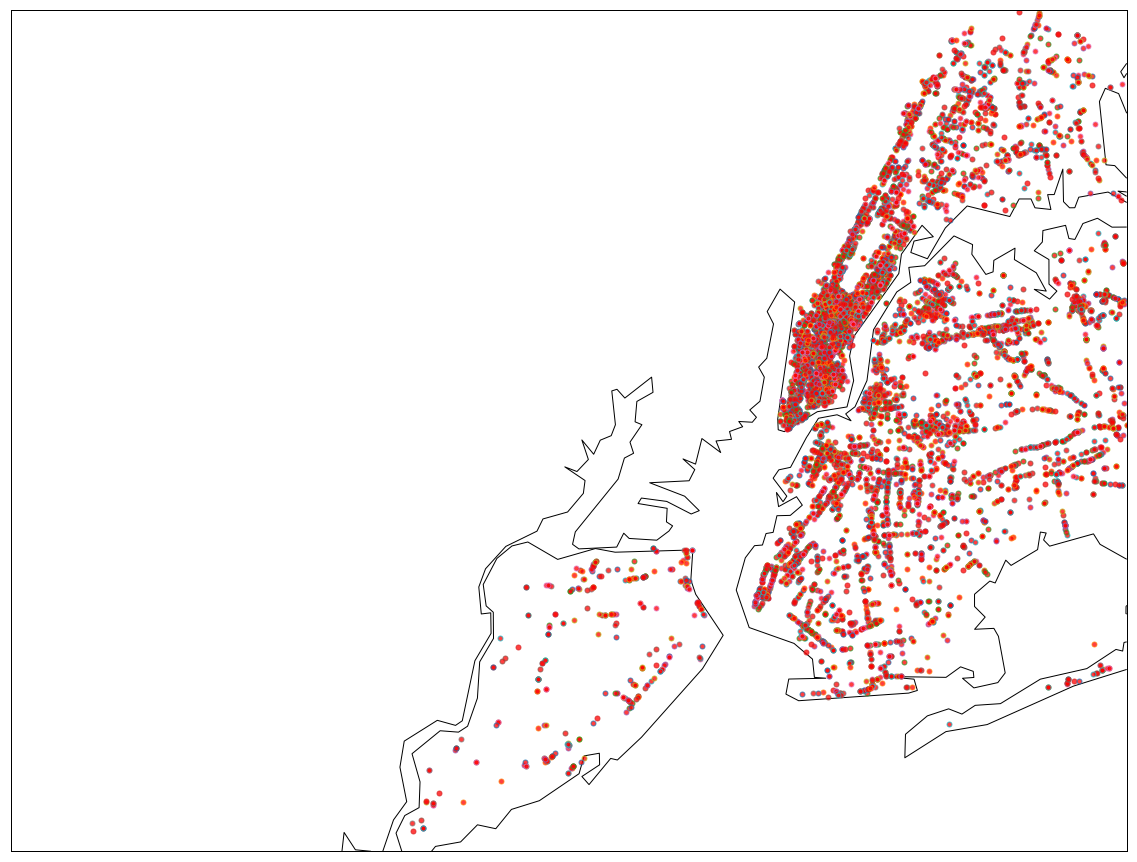

In [48]:
#Initial settings for plotting the sample observations on the map
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = (20,20)

llon= -74.5
ulon= -73.8
llat= 40.5
ulat= 40.9

df_clus= df_clus[(df_clus['Longitude'] > llon) & (df_clus['Longitude'] < ulon) & (df_clus['Latitude'] > llat) &(df_clus['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh=50,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
#my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.1)
#my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(df_clus.Longitude), np.asarray(df_clus.Latitude))
df_clus['xm']= xs.tolist()
df_clus['ym'] =ys.tolist()

#Visualization1
for index,row in df_clus.iterrows():
#   x,y = my_map(row.Long, row.Lat)
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



In [49]:
#Mapping Purely Based on Location (xm and ym are long and lat)
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
Clus_dataSet = df_clus[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=15).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_clus["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_clus[["DBA","BORO","Clus_Db"]].head(10)

,DBA,BORO,Clus_Db
264045,PIO PIO,Manhattan,0
45124,OMEN JAPANESE CUISINE,Manhattan,0
108777,FASCATI'S PIZZERIA,Brooklyn,1
341264,NICA TRATTORIA,Manhattan,0
126407,GREENWICH STREET TAVERN,Manhattan,0
276301,CHECKERS,Bronx,0
215276,EXQUISITO RESTAURANT,Queens,1
313067,HUNGRY GHOST COFFEE BAR AT FULTON,Brooklyn,1
190843,C & T CUISINE,Brooklyn,-1
8655,MOM'S BAKERY,Bronx,0


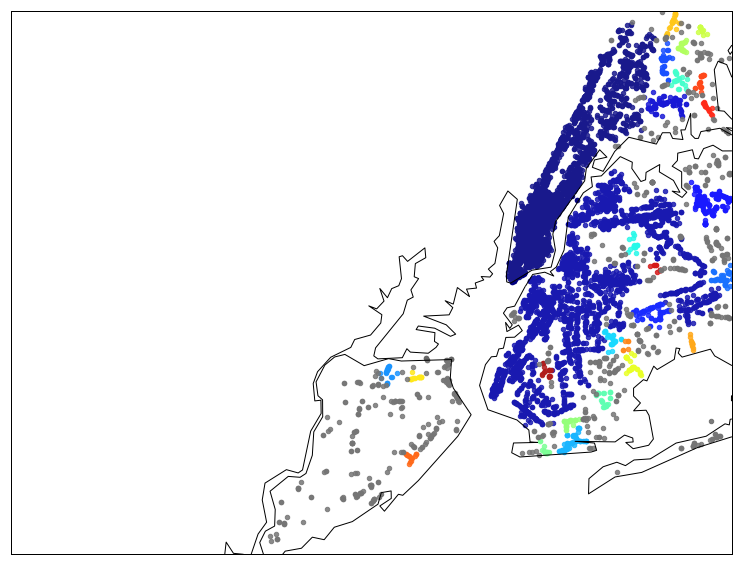

In [50]:
#Mapping Purely Based on Location
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh=50,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
#my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.1)
#my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_clus[df_clus.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    #if clust_number != -1:
        #cenx=np.mean(clust_set.xm) 
        #ceny=np.mean(clust_set.ym) 
        #plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        #print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

In [51]:
#Preparing for Mapping Purely Based on Location & Critical Inpection by Deleting rows with NAN
df_clus = df_clus[pd.notnull(df_clus["CRITICAL"])]
df_clus = df_clus.reset_index(drop=True)
df_clus.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,xm,ym,Clus_Db
0,41294647,PIO PIO,Manhattan,210,EAST 34 STREET,10016.0,2124810034,Peruvian,04/17/2019,Violations were cited in the following area(s).,...,-73.977679,106.0,2.0,7000.0,1020134.0,1.009140e+09,MN20,58079.445680,35969.027749,0
1,40374415,OMEN JAPANESE CUISINE,Manhattan,113,THOMPSON STREET,10012.0,2129258923,Japanese,01/18/2018,Violations were cited in the following area(s).,...,-74.001851,102.0,3.0,4900.0,1007787.0,1.005030e+09,MN24,55391.633985,33078.132975,0


In [52]:
#Deleting those Rows Where Critical Inspection was 'No'
df_clus = df_clus[df_clus.CRITICAL != 'N']
df_clus = df_clus.reset_index(drop=True)
df_clus.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,xm,ym,Clus_Db
0,41207574,NICA TRATTORIA,Manhattan,354,EAST 84 STREET,10028.0,2124725040,Italian,05/06/2016,Violations were cited in the following area(s).,...,-73.951445,108.0,5.0,13800.0,1049932.0,1.015460e+09,MN32,60996.530871,40445.297424,0
1,50002562,EXQUISITO RESTAURANT,Queens,2112,36TH AVENUE,11106.0,7187843505,Spanish,02/01/2017,Violations were cited in the following area(s).,...,-73.936581,401.0,26.0,3300.0,4004269.0,4.003480e+09,QN68,62649.300383,38060.191140,1


In [53]:
#Assigning Numerical Values to CRITICAL
df_clus['CRITICAL'].replace({'Y': 1}, inplace=True)

In [54]:
#Replacing categorical values by numerical values (int)
df_clus['BORO'].replace({'Brooklyn': 1, 'Queens': 2, 'Manhattan': 3, 'Bronx':4, 'Staten Island':5}, inplace=True)

In [55]:
#Mapping Purely Based on Location & Critical Inpection
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
Clus_dataSet = df_clus[['xm','ym','CRITICAL','BORO']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=30).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_clus["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_clus[["DBA","BORO","CRITICAL","Clus_Db"]].head(2)

,DBA,BORO,CRITICAL,Clus_Db
0,NICA TRATTORIA,3,1,0
1,EXQUISITO RESTAURANT,2,1,-1


Cluster 0, Zipcodes: [10028. 10024. 10029. 10014. 10016. 10010. 10009. 10001. 10002. 10013.
 10007. 10019. 10003. 10011. 10017. 10065. 10027. 10121. 10036. 10025.
 10038. 10018. 10005. 10023. 10022. 10075. 10006. 10021. 10012. 10280.
 10026. 10004. 10282. 10128. 10103. 10281. 10020. 10119. 10112. 10169.
 10165. 10118. 10168.]
Cluster 1, Zipcodes: [11217. 11215. 11201. 11205. 11238. 11231.]
Cluster 2, Zipcodes: [11372. 11377. 11373. 11368. 11369.]
Cluster 3, Zipcodes: [11102. 11101. 11105. 11103. 11106.]
Cluster 4, Zipcodes: [11354. 11355. 11357.]
Cluster 5, Zipcodes: [11216. 11238. 11213.]
Cluster 6, Zipcodes: [11209. 11220. 11219. 11232. 11228.]
Cluster 7, Zipcodes: [10458. 10457. 10460.]
Cluster 8, Zipcodes: [11104. 11377. 11101.]
Cluster 9, Zipcodes: [11214.]
Cluster 10, Zipcodes: [11211. 11249. 11222. 11206.]
Cluster 11, Zipcodes: [11221. 11237. 11206.]
Cluster 12, Zipcodes: [10468. 10453. 10458. 10457.]
Cluster 13, Zipcodes: [10029. 10035.]
Cluster 14, Zipcodes: [10032. 10033. 100

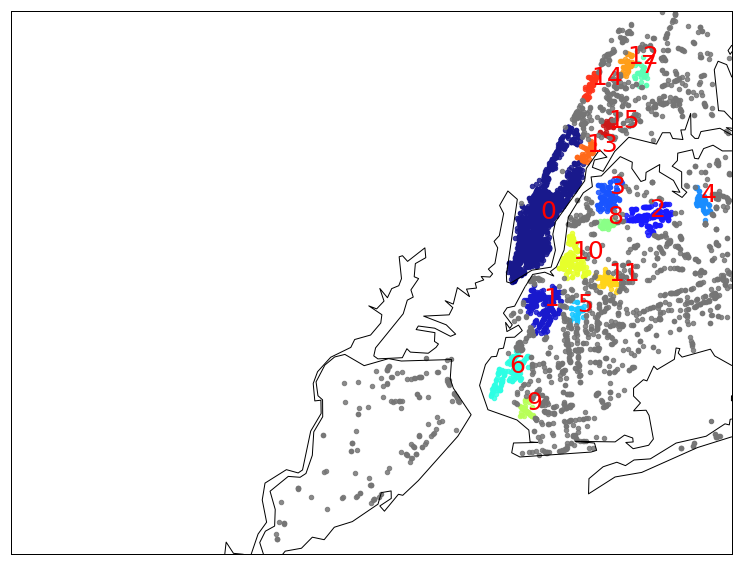

In [56]:
#Mapping Purely Based on Location and critical food violation
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh=50,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
#my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.1)
#my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_clus[df_clus.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
       cenx=np.mean(clust_set.xm) 
       ceny=np.mean(clust_set.ym) 
       plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
       print ("Cluster "+str(clust_number)+', Zipcodes: '+ str(clust_set.ZIPCODE.unique()))